# Linear Regression


![linear regression line](./images/linear_regression_line.png "linear_regression_line")

Linear Regression houdt, samenvattend, het volgende in:
1. Een rechte lijn aanpassen aan een dataset van waarnemingen
     > Minimaliseert de kwadratische fout tussen elk punt en de lijn y = m*x+b</br>

2. Deze lijn (Ml-model) gebruiken om te voorspellen.

3. Bepalen hoe *goed* het model is met behulp van statistische metrieken, zoals o.a. R<sup>2</sup> bij linear regression.
   
    > Waarde voor R<sup>2</sup> liggen in tussen 0 en 1: 0 = slecht, 1 = goed 
    > R<sup>2</sup> is ook bekend onder de naam **Pearson correlation coefficient**.


### Werkcollege onderwerpen:

#### Wat ga je doen?
Doorloop en voeruit (*Run* of *Shift+Enter*) de Python voorbeelden en doe de opdrachten. Kijk niet te snel in de voorbeeldoplossingen notebook, maar probeer het eerst zelf, of met teamgenoten.

- Setup: software engineering
> - Check de Python en library versies.
> - Helper functions - maken het leven makkelijker.
> - Configuraties voor betere grafieken.

- ML workflow
> - Data inlezen of genereren
> - Data verkennen, bij voorkeur visueel.
> - ML-model toepassen op de data: 2 regression modellen
> - ML-model valideren met statistische metrieken, zoals R<sup>2</sup>, RMSE en correlatieanalyse.
> - Het getrainde ML-model bewaren voor later gebruik.

- Opdrachten
> - linear regression, polynomial regression. multiple regression
> - validatie technieken
    > RMSE, R<sup>2</sup>, correlatieanalyse

- Datasets
> - random gegenereerde data
> - folder `data`: cars.xls

---
## Setup - software engineering

1. Requirements:
> Python >3.7</br>
> Scikit-Learn ≥ 1.0.1:

2. Plot configuratie: vergroot de labels om de figuren mooier te maken.

3. Maak een map `images/training_linear_models` (als deze nog niet bestaat) en definieer de functie `save_fig()` om de figuren in hoge resolutie op te slaan.

In [1]:
%matplotlib inline

import sys
from pathlib import Path
from packaging import version
import sklearn
import matplotlib.pyplot as plt

# Check Python and library versions
assert sys.version_info >= (3, 7)
# check scikit-learn version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
# show version numbers of libraries

# Python -> use platform and sys modules
import platform, sys
print(f"Python: {platform.platform()}, version: {sys.version[0:6]}")

# data science libraries
import numpy as np
import pandas as pd
import seaborn as sns
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

# plotting library
import matplotlib as mp
print(f"matplotlib: {mp.__version__}")

# ML-models library
import sklearn as sk
print(f"scikit-learn: {sk.__version__}")

# statistics library
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")

Python: Windows-10-10.0.26100-SP0, version: 3.11.9
numpy: 2.3.4
pandas: 2.3.3
seaborn: 0.13.2
matplotlib: 3.10.7
scikit-learn: 1.7.2
statsmodels: 0.14.5


---
## Voorbeeld eenvoudig linear regression probleem

Eenvoudige lineaire regressie omdat we met één (independend)variabele het model laten uitrekenen:

- genereer 100 willekeurige data, zijnde de independend data X.
- genereer de depended variable y volgens een lineare relatie met random data gesuperponeerd. 
  > Kortom, eigelijk weten we al wat de ML-model parameters zijn (richtingscoeffcient en interceptie).
- train de data
- bekijk de resultaten voor het ML-model

In [3]:
# generate data

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [4]:
# ML model - using sklearn 
from sklearn.linear_model import LinearRegression

# ML model: selection and train and results
lin_reg = LinearRegression()
lin_reg.fit(X, y)  # train
lin_reg.intercept_, lin_reg.coef_    # results linear model

(array([4.21509616]), array([[2.77011339]]))

Dit betekent dat het ML model is:
y = 2.77011339*X + 4.21509616</br>
Hetgeen we ook hadden verwacht: y = 3*X + 4

In [5]:
# predict new values
X_new = np.array([[0], [2]])  # new, unknown X
y_predict = lin_reg.predict(X_new)
y_predict

array([[4.21509616],
       [9.75532293]])

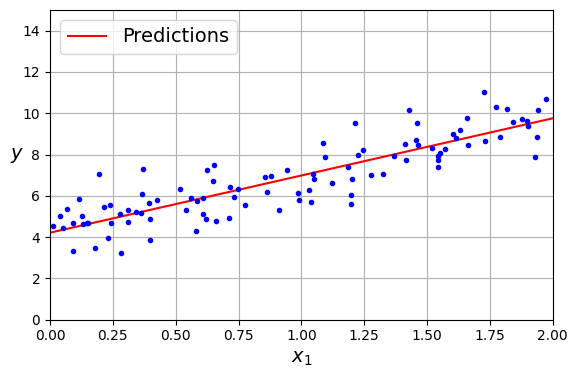

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves plot
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

NB. Het ML model `LinearRegression` is gebaseerd op de functie `scipy.linalg.lstsq()` (de naam staat voor "kleinste kwadraten").

---

## Een 2de uitgebreider voorbeeld Linear regression

We nemen nu ook mee een metriek, zoals R<sup>2</sup> om te zien "hoe goed" het model is.

Laten we wat gegevens fabriceren die een ruwweg lineaire relatie laten zien tussen de paginasnelheid (in seconden) en het gekochte bedrag (in euro's):

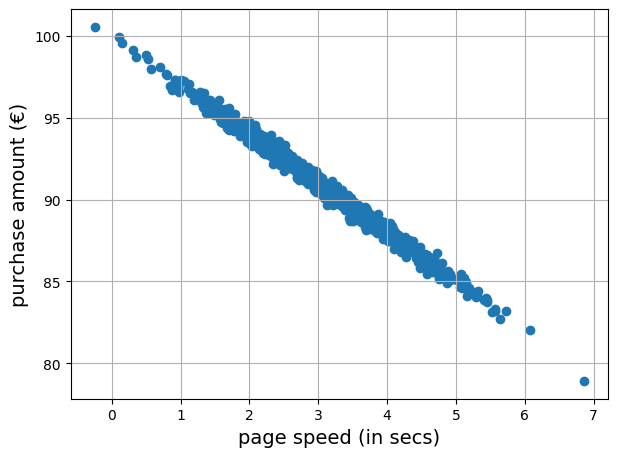

In [7]:
%matplotlib inline

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

# extra code – nicer plot
plt.xlabel("page speed (in secs)")
plt.ylabel("purchase amount (€)")
plt.grid()

plt.scatter(pageSpeeds, purchaseAmount)

save_fig("Pagespeed-scatterplot")
plt.show()

Omdat we maar twee attributen/features hebben, kunnen we het simpel houden en gebruik maken van `scipy.state.linregress`:

In [8]:
from scipy import stats

slope, intercept, r_value, p_value, std_err  \
= stats.linregress(pageSpeeds, purchaseAmount)

#slope

In [9]:
# ML-model vergelijking
print(f"ML-model: purchaseAmount = {slope:0.3f}*pageSpeed + {intercept:0.3f}")

ML-model: purchaseAmount = -2.987*pageSpeed + 99.952


R<sup>2</sup> is een statische metriek waaraan je kan zien hoe goed de aanpassing is. Zie theorie.

Het zal niet verrassend zijn dat onze R<sup>2</sup>-waarde echt goed past:

In [10]:
r_value ** 2

np.float64(0.9903290786370731)

Laten we de helling (*slope*) en het snijpunt (*intercept*) van de regressie gebruiken om de voorspelde waarden uit te zetten tegen de waargenomen waarden:

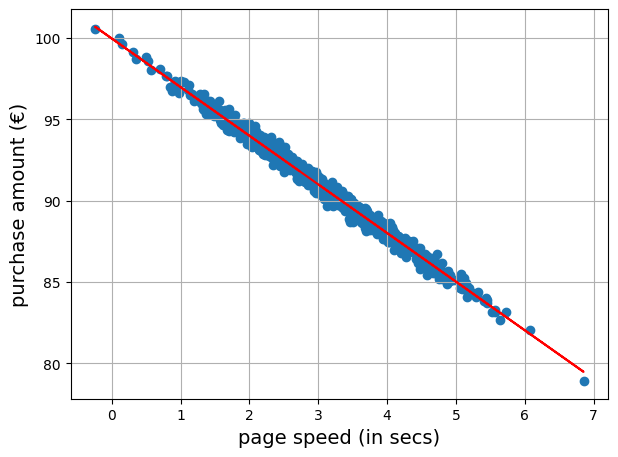

In [11]:
def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

# extra code – nicer plot
plt.xlabel("page speed (in secs)")
plt.ylabel("purchase amount (€)")
plt.grid()

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')

save_fig("Pagespeed-linear_model")
plt.show()


## Opdracht linear regression

Probeer de willekeurige variatie in de testgegevens te vergroten en te verkleinen, en kijk welk effect dit heeft op de R<sup>2</sup> waarde.

slope: -3.022857055936147
intercept: 100.07340277116177
std_err: 0.09777261636683982
R-squared: 0.48921993500888866


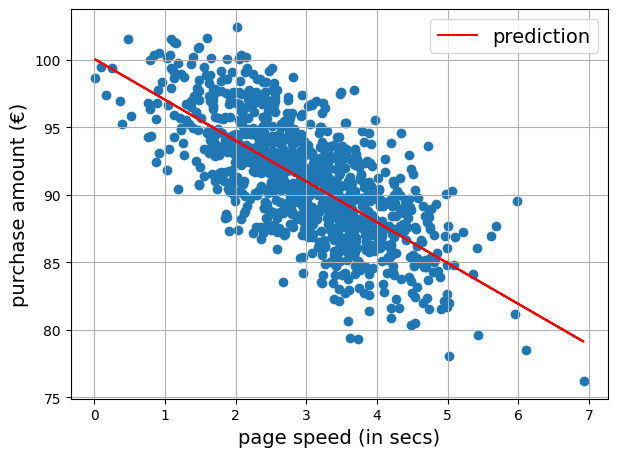

In [12]:
# hier komt jouw code
# test data
pageSpeeds = np.random.normal(3.0, 1.0, 1000)

# various std values gives the variations in the test data
# std higher -> more variations -> worser R2,
# std lower -> less variations -> higher R2
std = 0.1   # R2 = 0.99  - initial value
std = 1.0   # R2 = 0.5   - more variations
#std = 0.05  # R2 = 0.997 - less variations
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, std, 1000)) * 3

# calculate linear regression parameters
slope, intercept, r_value, p_value, std_err  \
= stats.linregress(pageSpeeds, purchaseAmount)

# print linear regression parameters
print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"std_err: {std_err}")

# how good is the regression model
print(f"R-squared: {r_value ** 2}")

# plot test data and fitted line

# calculate the fitted line
fitLine = predict(pageSpeeds)

# extra code – nicer plot
plt.xlabel("page speed (in secs)")
plt.ylabel("purchase amount (€)")
plt.grid()

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r', label="prediction")
plt.legend(loc="upper right")

save_fig("Pagespeed-linear_model-opdracht-variaties")
plt.show()